# Warmup 10-13-2020

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
from scipy import stats

df1 = pd.read_csv('https://gist.githubusercontent.com/zgulde/cf9e11788c122bf6a75447209f8a9f0e/raw/17535dc2c29d6c47c228279e8941c037bb2d4405/one.csv')
df2 = pd.read_csv('https://gist.githubusercontent.com/zgulde/cf9e11788c122bf6a75447209f8a9f0e/raw/17535dc2c29d6c47c228279e8941c037bb2d4405/two.csv')
df3 = pd.read_csv('https://gist.githubusercontent.com/zgulde/cf9e11788c122bf6a75447209f8a9f0e/raw/a6e34db05ac8d817789c205787527974fa10c092/three.csv')

### For df1:

Take a look at the data in df1.
Does x increase from time one to time two?
Visualize the relationship between x and time.
Run a statistical test to further examine the relationship between these features.

In [2]:
df1.head()

,group,x,time
0,a,7.087113,one
1,a,5.164441,one
2,a,6.150206,one
3,a,3.732648,one
4,a,5.181035,one


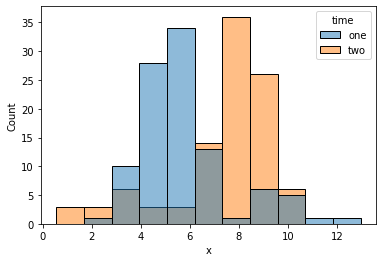

In [22]:
sns.histplot(x=df1.x, hue=df1.time,data=df1)

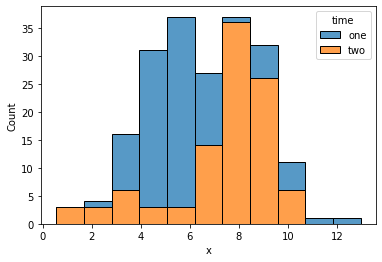

In [23]:
sns.histplot(x=df1.x, hue=df1.time, multiple='stack', data=df1)

In [4]:
one = df1[df1.time == 'one'].x
two = df1[df1.time == 'two'].x

In [5]:
# Two-sample, two-tailed t-test
stats, p = stats.ttest_ind(one, two)

In [27]:
fig, (ax1, ax2) = plt.subplot(2, 1, figsize=(13, 8), sharex=True, sharey=True)

df1.querry('group=="a" & time == "one"').x.plot.hist(ax=ax1, label='a')
df1.querry('group=="b" & time == "one"').x.plot.hist(ax=ax1, label='b')
plt.set(title='Time One')
ax1.legend()

df1.querry('group=="a" & time == "two"').x.plot.hist(ax=ax1, label='a')
df1.querry('group=="b" & time == "two"').x.plot.hist(ax=ax1, label='b')
plt.set(title='Time Two')
ax2.legend()

ValueError: Illegal argument(s) to subplot: (2, 1)

<Figure size 432x288 with 0 Axes>

### For df2:

Take a look at the data in df2.
Visualize the relationship between x and y.
How would you describe the relationship between x and y?
Run a statistical test to examine the relationship between x and y.

In [6]:
df2.head()

,x,y,group
0,101.243108,597.915453,a
1,107.492036,579.638663,a
2,105.348935,614.607337,a
3,99.981116,607.082320,a
4,102.764199,606.082835,a


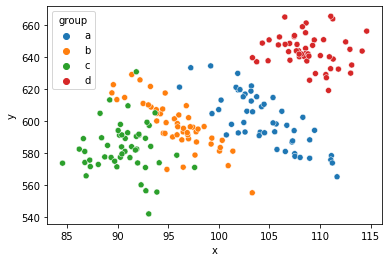

In [7]:
sns.scatterplot(x=df2.x, y=df2.y, hue=df2.group)

In [18]:
# correlation test
#r, p = stats.pearsonr(df2.x, df2.y)
#p

### For df3:

Take a look at the data in df3
Which surgeon has the higher success rate?
If you had to have heart bypass surgery, which surgeon should you go to?

In [9]:
df3

,surgeon,surgery,success
0,A,appendectomy,1
1,B,appendectomy,1
2,A,heart bypass,0
3,A,appendectomy,1
4,A,heart bypass,1
...,...,...,...
995,A,appendectomy,1
996,B,heart bypass,1
997,B,heart bypass,0
998,A,heart bypass,0


Text(0.5, 1.0, 'Success vs. Failure of Each Surgeon')

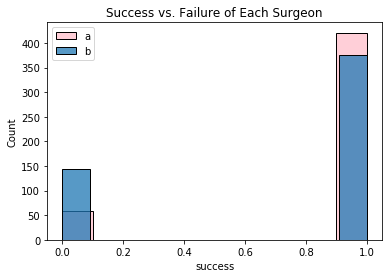

In [10]:
a = df3[df3.surgeon == 'A']
b = df3[df3.surgeon == 'B']

sns.histplot(x=a.success, multiple="stack",color='pink')
sns.histplot(x=b.success, multiple="stack")
plt.legend('ab')
plt.title('Success vs. Failure of Each Surgeon')

Text(0.5, 1.0, 'Success vs. Failure of Each Surgeon')

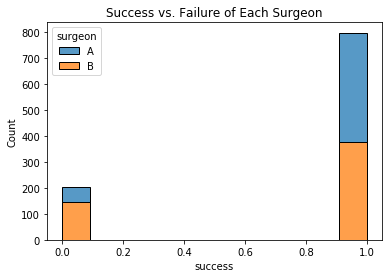

In [11]:
sns.histplot(x=df3.success, hue=df3.surgeon, multiple="stack")

plt.title('Success vs. Failure of Each Surgeon')

Text(0.5, 1.0, 'Success vs. Failure of Each Surgery: Surgeon A')

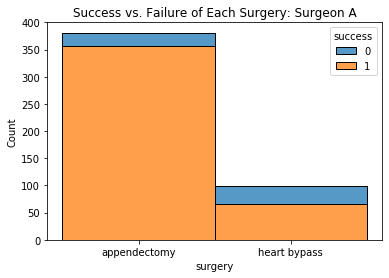

In [12]:
sns.histplot(x=a.surgery, hue=a.success, multiple="stack")
plt.title('Success vs. Failure of Each Surgery: Surgeon A')

Text(0.5, 1.0, 'Success vs. Failure of Each Surgery: Surgeon B')

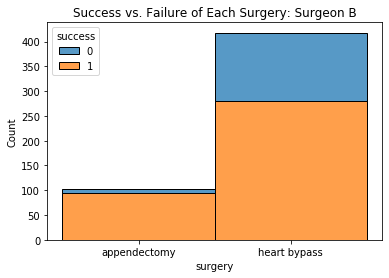

In [13]:
sns.histplot(x=b.surgery, hue=b.success, multiple="stack")
plt.title('Success vs. Failure of Each Surgery: Surgeon B')

In [14]:
pd.crosstab(df3.success, df3.surgeon)

surgeon,A,B
success,,
0,59,144
1,421,376


In [15]:
heart_bypass = df3[df3.surgery == 'heart bypass']

df = pd.crosstab(heart_bypass.success, heart_bypass.surgeon)

In [20]:
df3.groupby(['surgery','surgeon']).success.mean()

surgery       surgeon
appendectomy  A          0.934383
              B          0.931373
heart bypass  A          0.656566
              B          0.672249
Name: success, dtype: float64

### For df1 and df2:
What happens to the relationships if you take into account the group feature?